In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
df = pd.read_csv('datos/df_final.csv', encoding='utf-8', decimal=',')
df

,Marca,Modelo,Año,Kilometraje,Transmision,Tipo de Vendedor,Región,Precio
0,suzuki,baleno,2021,27000,1,0,7,11100000
1,suzuki,baleno,2020,41113,1,1,12,9490000
2,suzuki,baleno,2022,29588,1,1,12,10990000
3,suzuki,baleno,2021,51622,1,1,7,10290000
4,suzuki,baleno,2020,90000,1,1,7,8990000
...,...,...,...,...,...,...,...,...
266,chery,tiggo-2,2022,5800,1,0,7,9550000
267,chery,tiggo-2,2018,43120,1,0,11,10400000
268,chery,tiggo-2,2019,50000,1,0,7,9000000
269,chery,tiggo-2,2021,17000,1,0,7,9300000


# Seaborn Heatmap
No aporta mucha información, las variables tienen escalas muy distintas

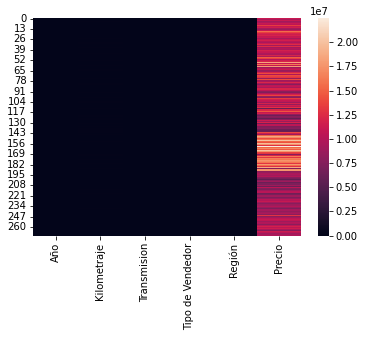

In [9]:
df_heatmap = df[['Año', 'Kilometraje', 'Transmision','Tipo de Vendedor', 'Región', 'Precio']]
sns.heatmap(df_heatmap)
plt.show()

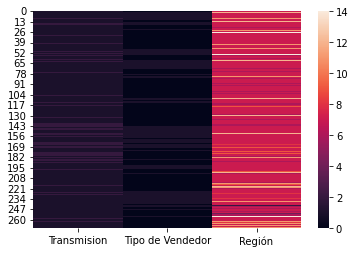

In [15]:
df_hm2 = df[['Transmision', 'Tipo de Vendedor', 'Región']]
sns.heatmap(df_hm2)
plt.show()

In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Cono tenemos solo 2 valores para la transmisión podemos separar el df en 2

[(0.0, 250000.0)]

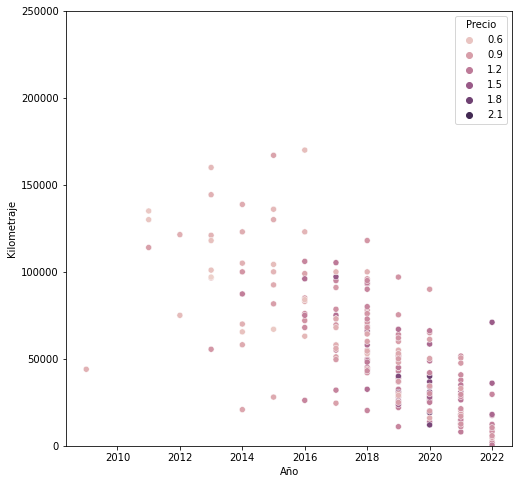

In [19]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_manual = df[df['Transmision']==1]

graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='Precio')
graph.set(ylim=(0, 250000))

[(0.0, 250000.0)]

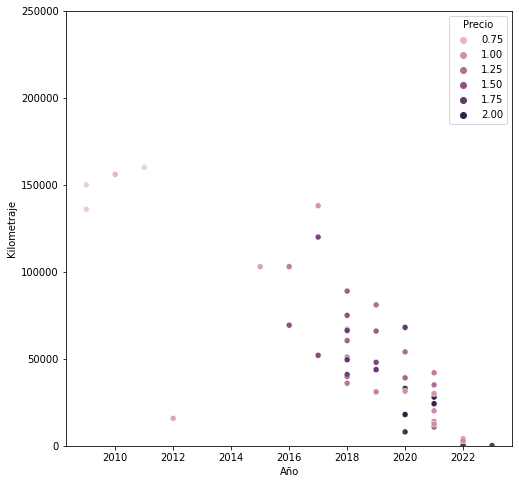

In [20]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_automatico = df[df['Transmision']==2]

graph = sns.scatterplot(data=df_automatico, y='Kilometraje', x='Año', hue='Precio')
graph.set(ylim=(0, 250000))

Se observa que hay una correlación(relativamente lineal), mientras más nuevo es el auto y menos kilometraje tiene más caro es el auto

# Análisis por Grupos/Estadístico

In [56]:
df

,Marca,Modelo,Año,Kilometraje,Transmision,Tipo de Vendedor,Región,Precio,kcls_labels
0,suzuki,baleno,2021,27000,1,0,7,11100000,3
1,suzuki,baleno,2020,41113,1,1,12,9490000,3
2,suzuki,baleno,2022,29588,1,1,12,10990000,3
3,suzuki,baleno,2021,51622,1,1,7,10290000,3
4,suzuki,baleno,2020,90000,1,1,7,8990000,1
...,...,...,...,...,...,...,...,...,...
266,chery,tiggo-2,2022,5800,1,0,7,9550000,3
267,chery,tiggo-2,2018,43120,1,0,11,10400000,1
268,chery,tiggo-2,2019,50000,1,0,7,9000000,1
269,chery,tiggo-2,2021,17000,1,0,7,9300000,3


In [67]:
regiones = [2, 4, 6, 7, 8, 9, 11, 12, 14]

In [72]:
pub_por_region = df.groupby('Región')['Precio'].count()
print(f'Distribución de publicaciones por región:')
pub_por_region

Distribución de publicaciones por región:


Región
2       1
4       1
6      26
7     194
8       7
9      10
11     16
12     10
14      5
Name: Precio, dtype: int64

Vemos que hay una clara desigualdad de información, la región con más publicaciones es la Metropolitana(7)

In [69]:
precio_prom_por_region = df.groupby('Región')['Precio'].mean()
print('precio promedio de automovil por región:')
for i in range(len(precio_prom_por_region)):
    print(f'región {regiones[i]} : {precio_prom_por_region.iloc[i]}')

precio promedio de automovil por región:
región 2 : 8980000.0
región 4 : 10550000.0
región 6 : 10577307.692307692
región 7 : 10984605.293814434
región 8 : 9987142.857142856
región 9 : 11755000.0
región 11 : 11279375.0
región 12 : 10739000.0
región 14 : 10834000.0


Vemos que el precio promedio de los vehículos puede variar de forma significativa de una región a otra, siendo las regiones con el promedio más alto las de Maule(9) y Bío Bío(11) y la de promedio más bajo es la región de Tarapacá(2). Esto puede deberse a una falta de oferta

In [59]:
vendedor_mas_frecuente = df['Tipo de Vendedor'].mode()  # la moda
vendedor_mas_frecuente      # vendedor particular

0    0
Name: Tipo de Vendedor, dtype: int64

In [62]:
df_santiago = df[df['Región']==8]
vendedor_mas_frecuente_stgo = df_santiago['Tipo de Vendedor'].mode()
vendedor_mas_frecuente_stgo

0    1
Name: Tipo de Vendedor, dtype: int64

Vemos que el tipo de vendedor más frecuente en todo el país son vendedores particulares, aunque esto no se cumple en todo el país, por ejemplo el tipo de vendedor más frecuente en la región Metropolitana(número 8) es Automotora Usado.

In [74]:
por_transmision = df.groupby('Transmision')['Región'].count()
por_transmision

Transmision
1    217
2     53
Name: Región, dtype: int64

Hay una clara mayoría de autos mecánicos a la venta

# Clustering

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
# normalizar datos
df = df[df['Kilometraje']<=250000]
df = df[df['Año']>=2005]
df_numerico = df[['Año', 'Kilometraje', 'Transmision', 'Tipo de Vendedor', 'Región', 'Precio']]
scaler=StandardScaler()
dat_sc=scaler.fit_transform(df_numerico)

In [6]:
# método del codo para definir número de clústers
inertia = []
kmax = 15
for i in range(1,kmax):

    kmeans = KMeans(n_clusters=i,n_init=10)
    kncl= kmeans.fit(dat_sc)

    #print(i,kncl.inertia_)
    inertia.append(kncl.inertia_)

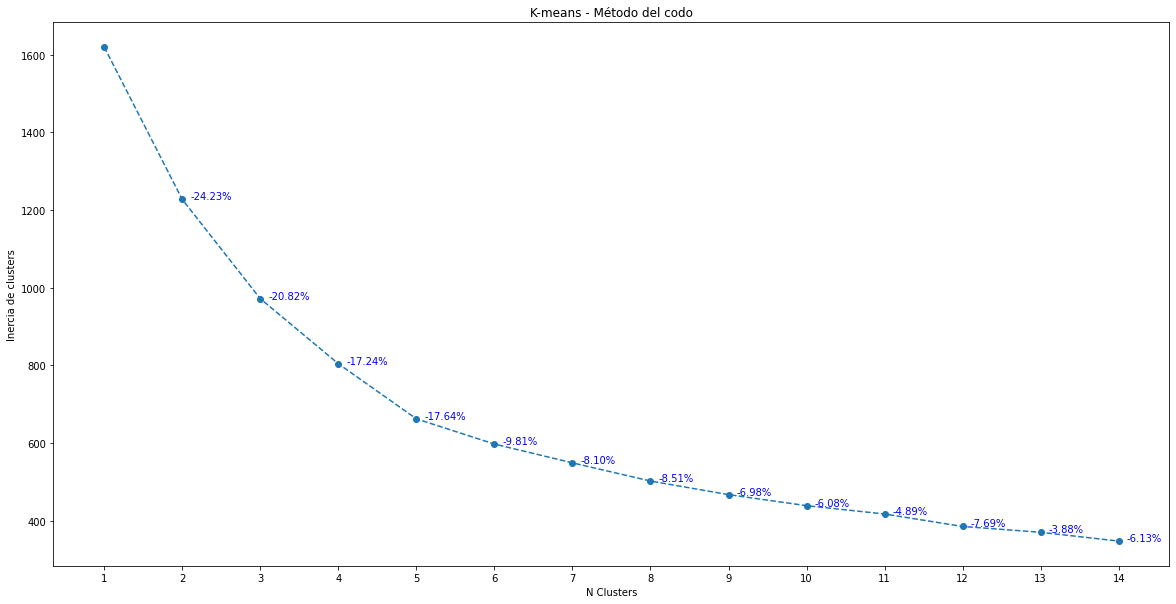

In [7]:
f, ax = plt.subplots(1,1, figsize=(20,10))

ax.plot(range(1,kmax),inertia,marker='o',ls='--')
ax.set_xlabel('N Clusters')
ax.set_ylabel('Inercia de clusters')
ax.set_title('K-means - Método del codo')

for i in range(1,len(inertia)):
    delta=(-inertia[i-1]+inertia[i])/inertia[i-1]*100
    ax.text(i+1.1,inertia[i],'%.2f'%delta+'%',color='b')
ax.set_xticks(range(1,kmax))

plt.show()

Vamos a considerar 5 clústers

In [8]:
kmeans = KMeans(n_clusters=5,random_state=0)
kcls = kmeans.fit(dat_sc)
df['kcls_labels']=kcls.labels_

In [9]:
df

,Marca,Modelo,Año,Kilometraje,Transmision,Tipo de Vendedor,Región,Precio,kcls_labels
0,suzuki,baleno,2021,27000,1,0,7,11100000,0
1,suzuki,baleno,2020,41113,1,1,12,9490000,4
2,suzuki,baleno,2022,29588,1,1,12,10990000,4
3,suzuki,baleno,2021,51622,1,1,7,10290000,3
4,suzuki,baleno,2020,90000,1,1,7,8990000,3
...,...,...,...,...,...,...,...,...,...
266,chery,tiggo-2,2022,5800,1,0,7,9550000,0
267,chery,tiggo-2,2018,43120,1,0,11,10400000,4
268,chery,tiggo-2,2019,50000,1,0,7,9000000,0
269,chery,tiggo-2,2021,17000,1,0,7,9300000,0


Text(0.5, 0, 'Precio')

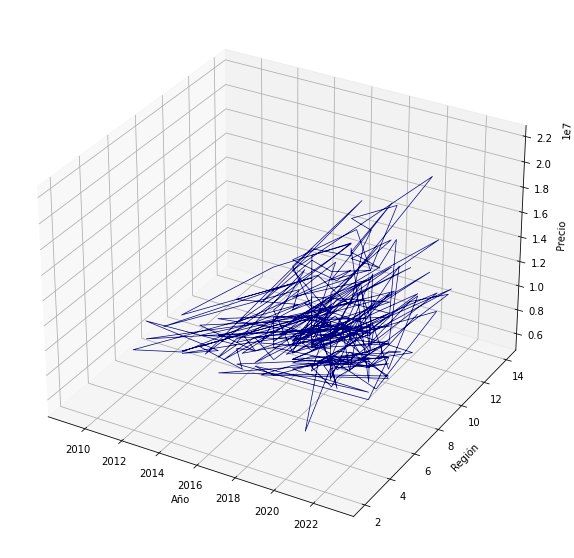

In [10]:
#%matplotlib widget
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(df['Año'], df['Región'], df['Precio'], lw=0.7, color='navy')
ax.set_xlabel('Año')
ax.set_ylabel('Región')
ax.set_zlabel('Precio')


C:\Users\aacas\AppData\Local\Temp\ipykernel_1960\2608927825.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  graph = sns.scatterplot(data=df, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])


[(0.0, 250000.0)]

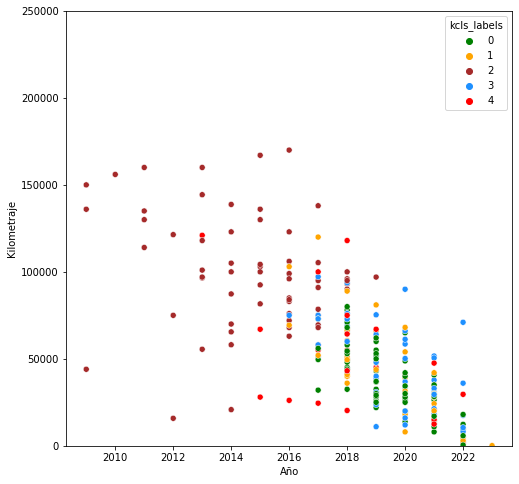

In [23]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

graph = sns.scatterplot(data=df, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])
graph.set(ylim=(0, 250000))

C:\Users\aacas\AppData\Local\Temp\ipykernel_1960\3876128743.py:6: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])


[(0.0, 250000.0)]

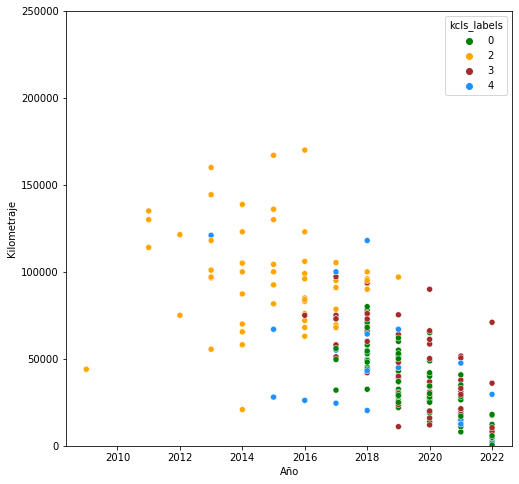

In [11]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_manual = df[df['Transmision']==1]

graph = sns.scatterplot(data=df_manual, y='Kilometraje', x='Año', hue='kcls_labels', palette=['green', 'orange', 'brown','dodgerblue','red', 'purple'])
graph.set(ylim=(0, 250000))

C:\Users\aacas\AppData\Local\Temp\ipykernel_1960\3368902766.py:6: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  graph = sns.scatterplot(data=df_automatico, y='Kilometraje', x='Año', hue='kcls_labels', palette=['orange', 'green', 'brown','dodgerblue','red', 'purple'])


[(0.0, 250000.0)]

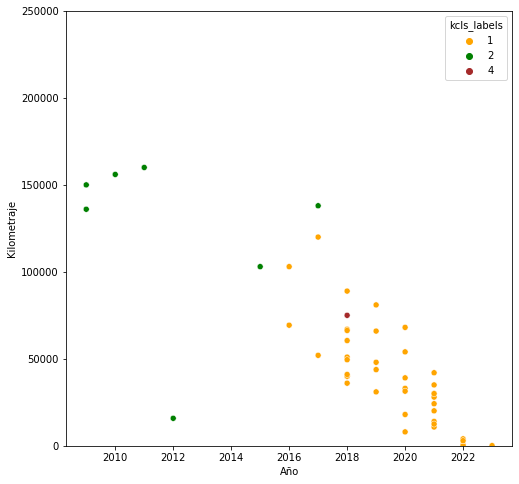

In [12]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111)

df_automatico = df[df['Transmision']==2]

graph = sns.scatterplot(data=df_automatico, y='Kilometraje', x='Año', hue='kcls_labels', palette=['orange', 'green', 'brown','dodgerblue','red', 'purple'])
graph.set(ylim=(0, 250000))

No tiene mucho sentido, no parece haber más relación que dividir por un rango de años

# Regresión

In [13]:
# división de datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

#Dividimos el dataframe de entrada, la misma separación de datos para todos los modelos
train,test = train_test_split(df, test_size=0.2, random_state=40) #para reproducir resultados

y_train = train.Precio
y_test = test.Precio

x_train = train[['Año', 'Kilometraje', 'Transmision', 'Tipo de Vendedor', 'Región']]
x_test = test[['Año', 'Kilometraje', 'Transmision', 'Tipo de Vendedor', 'Región']]

x_train

,Año,Kilometraje,Transmision,Tipo de Vendedor,Región
35,2021,26400,1,0,7
112,2011,130000,1,1,7
230,2020,20000,1,1,7
103,2018,95000,1,0,7
140,2011,160000,2,0,7
...,...,...,...,...,...
115,2019,25000,1,0,6
194,2021,30000,2,1,7
166,2020,68064,2,1,8
7,2020,29000,1,1,7


In [14]:
# Diccionarios para guardar errores, coeficientes
# comparamos los datos de entrenamiento y de prueba

coef_regresiones = {}

dic_R2_error_train = {}
dic_rmse_error_train = {}

dic_R2_error_test = {}
dic_rmse_error_test = {}

## Regresión Lineal

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linreg=LinearRegression()
# entrenar modelo con datos de entrenamiento
linreg.fit(x_train, y_train)
y_pred_train=linreg.predict(x_train)
# métricas de error entrenamiento
R2_lineal_train=linreg.score(x_train, y_train)
rmse_lineal_train=mean_squared_error(y_train, y_pred_train)

coef_regresiones['Regresión Lineal'] = linreg.coef_
dic_R2_error_train['Regresión Lineal'] = R2_lineal_train
dic_rmse_error_train['Regresión Lineal'] = rmse_lineal_train

#predecir valores de y para el set de prueba
y_pred_test = linreg.predict(x_test)
R2_lineal_test=linreg.score(x_test, y_test)
rmse_test=mean_squared_error(y_test, y_pred_test)
# métricas de error prueba
R2_lineal_test = linreg.score(x_test, y_test)
rmse_lineal_test=mean_squared_error(y_test, y_pred_test)

dic_R2_error_test['Regresión Lineal'] = R2_lineal_test
dic_rmse_error_test['Regresión Lineal'] = rmse_lineal_test

In [25]:
print(dic_R2_error_train['Regresión Lineal'], dic_rmse_error_train['Regresión Lineal'])

print(dic_R2_error_test['Regresión Lineal'], dic_rmse_error_test['Regresión Lineal'])

0.39158789399881866 6063995708541.257
0.3449556311430987 6997838296120.519


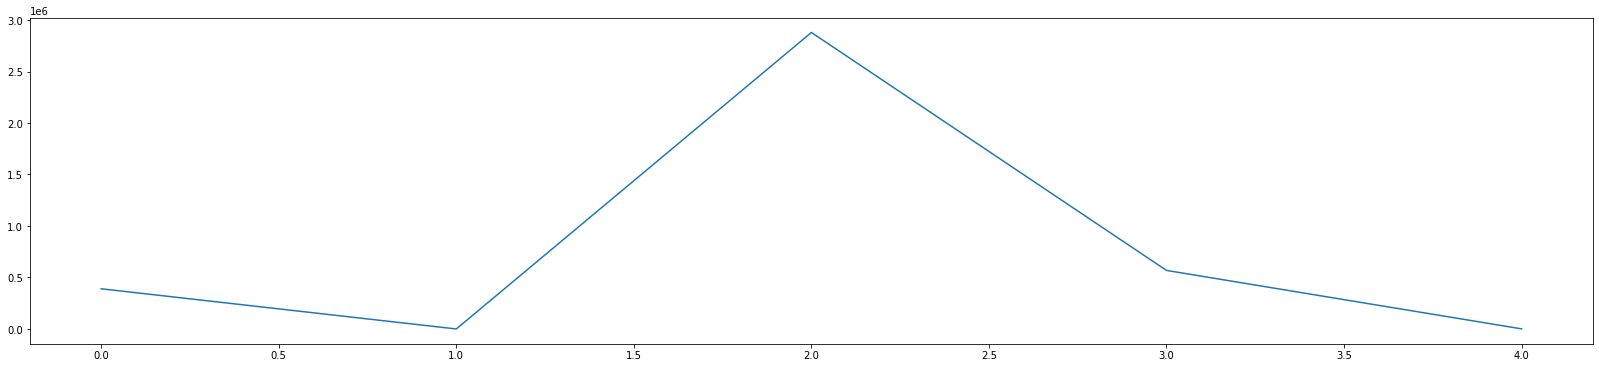

In [30]:
fig, ax1 = plt.subplots(1,1, figsize=(28,6))

ax1.plot(coef_regresiones['Regresión Lineal'])

## Regresión Ridge

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


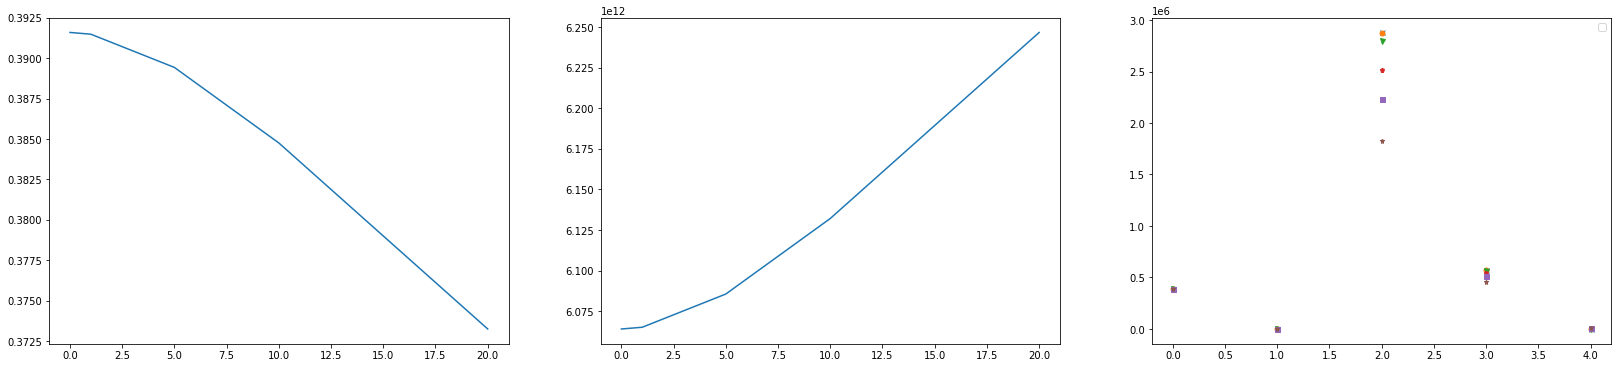

In [27]:
from sklearn.linear_model import Ridge

dic_error_R2_ridge = {}
dic_error_rsme_ridge = {}
dic_coefs_ridge = {}

alphas = [0.001, 0.01,1, 5, 10, 20]
for na,al in enumerate(alphas): 
    #print('Alpha:',al)
    rreg = Ridge(alpha=al)
    rreg.fit(x_train, y_train)

    y_train_pred = rreg.predict(x_train)
    train_score = rreg.score(x_train,y_train)
    dic_error_R2_ridge[al] = train_score
    dic_error_rsme_ridge[al] = mean_squared_error(y_train_pred, y_train)
    dic_coefs_ridge[al] = rreg.coef_

    # por ahora solo probar con datos de entrenamiento
    #y_test_pred = rreg.predict(x_test)
    #test_score = rreg.score(x_test, y_test)

# gráficos
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(28,6))
# ax1 : R2 para los valores de alpha
ax1.plot(dic_error_R2_ridge.keys(), dic_error_R2_ridge.values())
#ax1.set_ylim(0.4, 0.5)
# ax2 : RSME para los valores de alpha
ax2.plot(dic_error_rsme_ridge.keys(), dic_error_rsme_ridge.values())
# ax3: coef para los valores de alpha
ax3.plot(np.array([i for i in range(5)]), dic_coefs_ridge[0.001], linestyle='None', marker='x', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_ridge[0.01], linestyle='None', marker='o', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_ridge[1], linestyle='None', marker='v', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_ridge[5], linestyle='None', marker='p', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_ridge[10], linestyle='None', marker='s', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_ridge[20], linestyle='None', marker='*', markersize=5)
ax3.legend()    # agregar legend para diferenciar los valores de alpha
#.plot(np.arange(d+1),rreg.coef_,marker=markers[nd],color=color[nd],linestyle='None',markersize=10,lw=6,mfc='None',label='M=%d'%d)

El valor de alpha que minimiza el error es $\alpha=0.001$, lo usamos con datos de prueba ahora

In [34]:
rreg = Ridge(alpha=0.001)
rreg.fit(x_train, y_train)

y_train_pred = rreg.predict(x_train)

# por ahora solo probar con datos de entrenamiento
y_test_pred = rreg.predict(x_test)
test_score_ridge = rreg.score(x_test, y_test)

dic_rmse_error_train['Ridge'] = mean_squared_error(y_train_pred, y_train)
dic_R2_error_train['Ridge'] = rreg.score(x_train, y_train)
dic_rmse_error_train['Ridge'] = mean_squared_error(y_test_pred, y_test)
dic_R2_error_train['Ridge'] = test_score_ridge

## Lasso

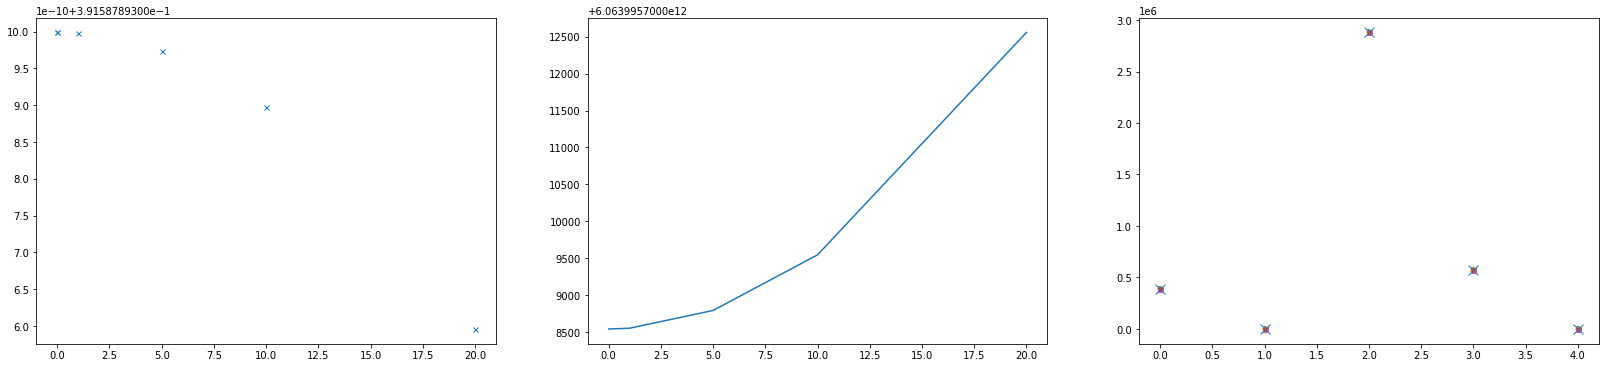

In [33]:
from sklearn.linear_model import Lasso

dic_error_R2_lasso = {}
dic_error_rsme_lasso = {}
dic_coefs_lasso = {}

alphas = [0.001, 0.01,1, 5, 10, 20]
for na,al in enumerate(alphas):
    lasso = Lasso(alpha=al)
    lasso.fit(x_train, y_train)

    #coeficientes de la regresión
    #print(rreg.coef_)
    dic_coefs_lasso[al] = lasso.coef_

    #predecimos respuesta para datos de entrenamiento y prueba
    y_train_pred = lasso.predict(x_train)
    y_test_pred = lasso.predict(x_test)

    #Cálculo de error (MSE) para datos de entrenamiento y prueba
    dic_error_rsme_lasso[al] = mean_squared_error(y_train_pred, y_train)
    #validation_error.append(mean_squared_error(y_test_pred, y_test))

    train_score = lasso.score(x_train,y_train)
    dic_error_R2_lasso[al] = train_score
    #test_score = lasso.score(x_test, y_test)

# gráficos
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(28,6))
# ax1 : R2 para los valores de alpha
ax1.plot(dic_error_R2_lasso.keys(), dic_error_R2_lasso.values(), linestyle='None', marker='x', markersize=5)
# ax2 : RSME para los valores de alpha
ax2.plot(dic_error_rsme_lasso.keys(), dic_error_rsme_lasso.values())
# ax3: coef para los valores de alpha
ax3.plot(np.array([i for i in range(5)]), dic_coefs_lasso[0.001], linestyle='None', marker='x', markersize=10)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_lasso[0.01], linestyle='None', marker='o', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_lasso[1], linestyle='None', marker='v', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_lasso[5], linestyle='None', marker='p', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_lasso[10], linestyle='None', marker='s', markersize=5)
ax3.plot(np.array([i for i in range(5)]), dic_coefs_lasso[20], linestyle='None', marker='*', markersize=5)
#ax3.legend()    # agregar legend para diferenciar los valores de alpha

# Comparación de Modelos

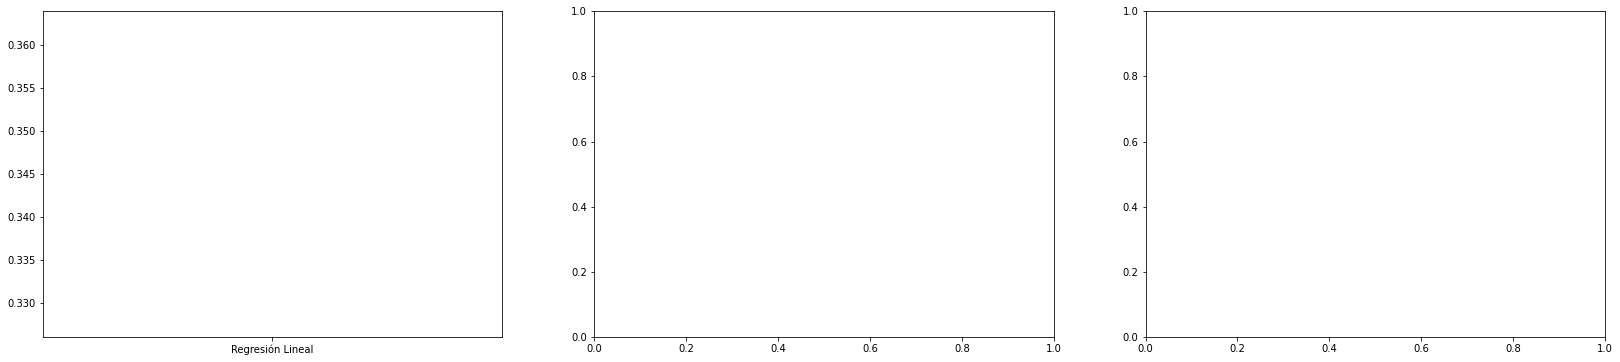

In [36]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3, figsize=(28,6))
# ax1 : R2 para los valores 
ax1.plot(dic_R2_error_test.keys() , dic_R2_error_test.values())
#ax1.set_ylim(0.4, 0.5)
# ax2 : RSME para los valores de alpha
#ax2.plot(dic_error_rsme_ridge.keys(), dic_error_rsme_ridge.values())